<a href="https://colab.research.google.com/github/sr-bn98/skills-copilot-codespaces-vscode/blob/main/resnetclassi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -c "import monai" || pip install -qU "monai[ignite, nibabel, torchvision, tqdm]==1.2.0"
!python -c "import sklearn" || pip install -qU "scikit-learn"


Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'monai'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━

In [ ]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"sarabana","key":"a0d4a93e7cb3c71b75d6870c787d479b"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d arifmia/brain-tumor-update-dataset

Dataset URL: https://www.kaggle.com/datasets/arifmia/brain-tumor-update-dataset
License(s): apache-2.0
 92% 137M/149M [00:01<00:00, 138MB/s]
100% 149M/149M [00:01<00:00, 108MB/s]


In [5]:
!unzip brain-tumor-update-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

There are 4 directories and 0 images in '/content/Training'.
There are 0 directories and 1321 images in '/content/Training/glioma'.
There are 0 directories and 1457 images in '/content/Training/pituitary'.
There are 0 directories and 1595 images in '/content/Training/notumor'.
There are 0 directories and 1339 images in '/content/Training/meningioma'.
------------------------------------------------------
There are 4 directories and 0 images in '/content/Testing'.
There are 0 directories and 300 images in '/content/Testing/glioma'.
There are 0 directories and 300 images in '/content/Testing/pituitary'.
There are 0 directories and 405 images in '/content/Testing/notumor'.
There are 0 directories and 306 images in '/content/Testing/meningioma'.
------------------------------------------------------


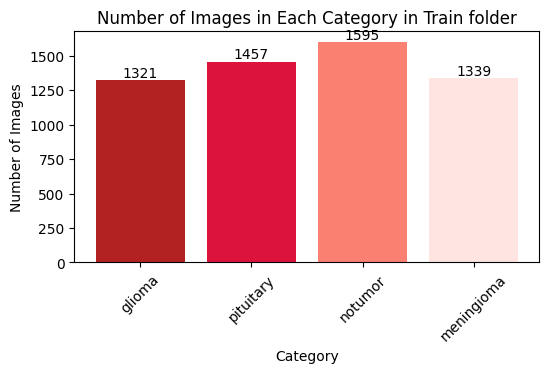

------------------------------------------------------


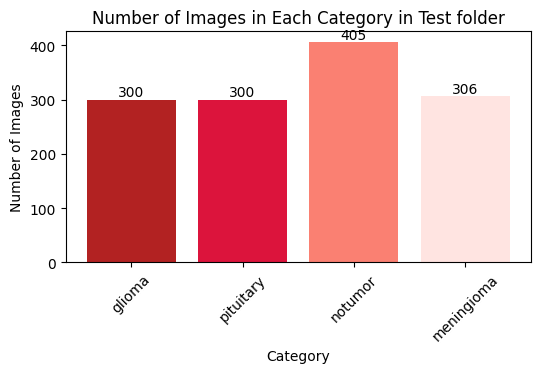

In [6]:
from glob import glob
import os
import matplotlib.pyplot as plt


for dirpath, dirnames, filenames in os.walk('/content/Training'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

print('------------------------------------------------------')

for dirpath, dirnames, filenames in os.walk('/content/Testing'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

print('------------------------------------------------------')


Directory = []
Subdirectories = []
Files = []
color = ['#B22222', '#DC143C', '#FA8072', '#FFE4E1']


for dirpath, dirnames, filenames in os.walk('/content/Training'):
    if filenames:
        Directory.append(os.path.basename(dirpath))
        Files.append(len(filenames))


fig, ax = plt.subplots(figsize=(6, 3))
bars = ax.bar(Directory, Files, color=color[:len(Files)])
ax.bar_label(bars)

plt.title('Number of Images in Each Category in Train folder')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

plt.show()

print('------------------------------------------------------')

Directory = []
Subdirectories = []
Files = []
color = ['#B22222', '#DC143C', '#FA8072', '#FFE4E1']


for dirpath, dirnames, filenames in os.walk('/content/Testing'):
    if filenames:
        Directory.append(os.path.basename(dirpath))
        Files.append(len(filenames))


fig, ax = plt.subplots(figsize=(6,3))
bars = ax.bar(Directory, Files, color=color[:len(Files)])
ax.bar_label(bars)

plt.title('Number of Images in Each Category in Test folder')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

plt.show()

In [7]:
import cv2
import numpy as np
from PIL import Image


def count_image_modes(main_dir):
    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
    rgb_count = 0
    grayscale_count = 0

    for class_name in class_names:
        class_dir = os.path.join(main_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)
                if img.mode == 'RGB':
                    rgb_count += 1
                elif img.mode == 'L':
                    grayscale_count += 1

    return rgb_count, grayscale_count

train_dir='/content/Training'
test_dir='/content/Testing'



rgb_count, grayscale_count = count_image_modes(train_dir)
print(f'RGB images in train dataset: {rgb_count}')
print(f'Grayscale images in train dataset: {grayscale_count}')
print('=======================================')
rgb_count, grayscale_count = count_image_modes(test_dir)
print(f'RGB images in test dataset: {rgb_count}')
print(f'Grayscale images in test dataset: {grayscale_count}')

RGB images in train dataset: 3236
Grayscale images in train dataset: 2472
RGB images in test dataset: 690
Grayscale images in test dataset: 621


In [8]:
def convert_to_grayscale(main_dir):
    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

    for class_name in class_names:
        class_dir = os.path.join(main_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)
                if img.mode == 'RGB':
                    gray_img = img.convert('L')
                    gray_img.save(img_path)
                    print(f'Converted {filename} to grayscale.')


convert_to_grayscale(train_dir)
convert_to_grayscale(test_dir)


Converted Tr-gl_0069.jpg to grayscale.
Converted Tr-gl_0072.jpg to grayscale.
Converted Tr-gl_0039.jpg to grayscale.
Converted Tr-gl_0093.jpg to grayscale.
Converted Tr-gl_0048.jpg to grayscale.
Converted Tr-gl_0088.jpg to grayscale.
Converted Tr-gl_0016.jpg to grayscale.
Converted Tr-gl_0043.jpg to grayscale.
Converted Tr-gl_0041.jpg to grayscale.
Converted Tr-gl_0097.jpg to grayscale.
Converted Tr-gl_0104.jpg to grayscale.
Converted Tr-gl_0096.jpg to grayscale.
Converted Tr-glTr_0005.jpg to grayscale.
Converted Tr-gl_0105.jpg to grayscale.
Converted Tr-gl_0092.jpg to grayscale.
Converted Tr-gl_0102.jpg to grayscale.
Converted Tr-gl_0117.jpg to grayscale.
Converted Tr-gl_0075.jpg to grayscale.
Converted Tr-gl_0078.jpg to grayscale.
Converted Tr-gl_0064.jpg to grayscale.
Converted Tr-gl_0020.jpg to grayscale.
Converted Tr-gl_0111.jpg to grayscale.
Converted Tr-gl_0014.jpg to grayscale.
Converted Tr-gl_0012.jpg to grayscale.
Converted Tr-gl_0033.jpg to grayscale.
Converted Tr-gl_0054.jp

In [37]:
rgb_count, grayscale_count = count_image_modes(train_dir)
print(f'RGB images in train dataset: {rgb_count}')
print(f'Grayscale images in train dataset: {grayscale_count}')
print('=======================================')
rgb_count, grayscale_count = count_image_modes(test_dir)
print(f'RGB images in test dataset: {rgb_count}')
print(f'Grayscale images in test dataset: {grayscale_count}')

RGB images in train dataset: 0
Grayscale images in train dataset: 5708
RGB images in test dataset: 0
Grayscale images in test dataset: 1311


In [56]:


class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
class_indices = {name: idx for idx, name in enumerate(class_names)}


train_files = []
for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    label = class_indices[class_name]
    for img_path in glob(os.path.join(class_dir, '*.jpg')):
              img = Image.open(img_path).convert('L')
              img_name = os.path.basename(img_path)
              img.save(os.path.join(train_dir, img_name))
              train_files.append({'image': img_path, 'label': label})
              image_array = np.array(img)
              if len(image_array.shape) == 3 :

                print('there is non gray image and the path and shape are respectly:', img_path , image_array.shape)




test_files = []
for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    label = class_indices[class_name]
    for img_path in glob(os.path.join(class_dir, '*.jpg')):
              img = Image.open(img_path).convert('L')
              img_name = os.path.basename(img_path)
              img.save(os.path.join(test_dir, img_name))
              test_files.append({'image': img_path, 'label': label})
              image_array = np.array(img)
              if len(image_array.shape) == 3 :

                print('there is non gray image and the path and shape are respectly:', img_path , image_array.shape)



print(train_files)
print(test_files)

[{'image': '/content/Training/glioma/Tr-gl_0367.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_0919.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_0852.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_1185.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_0069.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_1071.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_0625.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_0727.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_1277.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_0334.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_0125.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_1131.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_0950.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_0234.jpg', 'label': 0}, {'image': '/content/Training/glioma/Tr-gl_1140.jpg', 'label': 0}, {'image':

In [45]:
for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    label = class_indices[class_name]
    for img_path in glob(os.path.join(class_dir, '*.jpg')):
              img = Image.open(img_path)
              image_array = np.array(img)
              if len(image_array.shape) == 3:
                print('There is a non-gray image at path:', img_path, 'with shape:', image_array.shape)

            # Convert the image to grayscale
                img = img.convert('L')  # Convert to grayscale
                img.save(img_path)  # Save and overwrite the original image
                print(f'Converted {os.path.basename(img_path)} to grayscale and saved.')



There is a non-gray image at path: /content/Training/notumor/Tr-no_1019.jpg with shape: (400, 393, 4)
Converted Tr-no_1019.jpg to grayscale and saved.
There is a non-gray image at path: /content/Training/notumor/Tr-no_1011.jpg with shape: (664, 550, 4)
Converted Tr-no_1011.jpg to grayscale and saved.
There is a non-gray image at path: /content/Training/notumor/Tr-no_1020.jpg with shape: (454, 442, 4)
Converted Tr-no_1020.jpg to grayscale and saved.


In [55]:
for img_path in glob(os.path.join(test_dir, '*.jpg')):
              img = Image.open(img_path)
              image_array = np.array(img)
              if len(image_array.shape) == 3:
                print('There is a non-gray image at path:', img_path, 'with shape:', image_array.shape)


In [46]:
for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    label = class_indices[class_name]
    for img_path in glob(os.path.join(class_dir, '*.jpg')):
              img = Image.open(img_path)
              image_array = np.array(img)
              if len(image_array.shape) == 3:
                print('There is a non-gray image at path:', img_path, 'with shape:', image_array.shape)


(512, 512)
(512, 512)
(225, 225)
(512, 512)
(512, 512)
(201, 173)


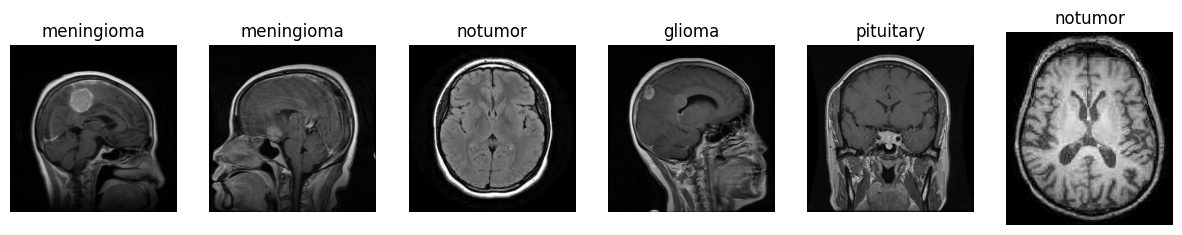

(512, 512)
(512, 512)
(417, 428)
(512, 512)
(512, 512)
(234, 209)


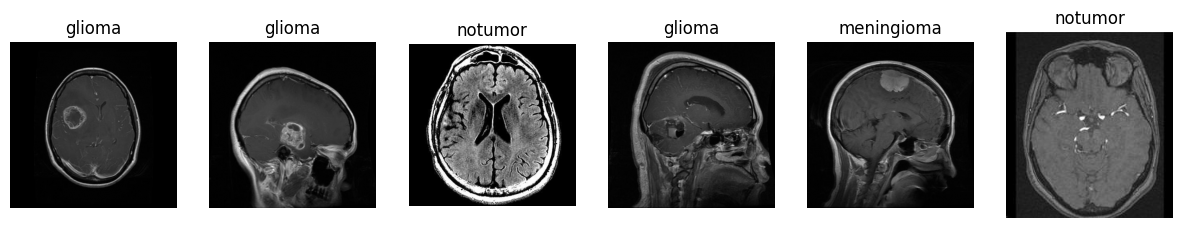

In [33]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def show_images(dir):
    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
    filepathes = []

    for class_name in class_names:
        class_dir = os.path.join(dir, class_name)
        for filename in os.listdir(class_dir):
            filepath = os.path.join(class_dir, filename)
            filepathes.append(filepath)

    images = random.sample(filepathes, 6)

    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(images):
        plt.subplot(1, 6, i + 1)
        img = Image.open(image_path)
        image_array = np.array(img)
        plt.imshow(img, cmap='gray')
        plt.title(os.path.basename(os.path.dirname(image_path)))
        plt.axis('off')
        print(image_array.shape)
    plt.show()



show_images(train_dir)
show_images(test_dir)



In [68]:
import os
import monai
from monai.data import Dataset, DataLoader
from monai.transforms import (
    Compose,
    LoadImaged,
    AddChanneld,
    ScaleIntensityd,
    ToTensord,
    Resized,
    EnsureChannelFirstd
)
from monai.data import utils


collate_fn = utils.pad_list_data_collate


transforms = Compose([
    LoadImaged(keys=('image')),
    EnsureChannelFirstd(keys=('image')),
    Resized(keys=('image'), spatial_size=(224, 224)),
    ScaleIntensityd(keys=('image')),
    ToTensord(keys=('image', 'label'),allow_missing_keys= True)
])






train_dataset = Dataset(data=train_files, transform=transforms)
test_dataset = Dataset(data=test_files, transform=transforms)


train_loader = DataLoader(train_dataset,collate_fn=utils.pad_list_data_collate, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [49]:
import torch
from monai.networks.nets import DenseNet121
from monai.losses import DiceLoss
from monai.optimizers import Novograd
from monai.metrics import DiceMetric
import torch.optim as optim
import torch.nn as nn


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DenseNet121(spatial_dims=2, in_channels=1, out_channels=4).to(device)


loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


Epoch 1/20: 100%|██████████| 714/714 [02:06<00:00,  5.65it/s]


Epoch 1/20, Training Loss: 0.3680425513854005, Validation Loss: 0.2898116176664012


Epoch 2/20: 100%|██████████| 714/714 [02:04<00:00,  5.72it/s]


Epoch 2/20, Training Loss: 0.2626567201647146, Validation Loss: 0.2557511629661681


Epoch 3/20: 100%|██████████| 714/714 [02:03<00:00,  5.76it/s]


Epoch 3/20, Training Loss: 0.19822361069360972, Validation Loss: 0.1825694374955918


Epoch 4/20: 100%|██████████| 714/714 [02:04<00:00,  5.74it/s]


Epoch 4/20, Training Loss: 0.15914205704093062, Validation Loss: 0.23944873680969667


Epoch 5/20: 100%|██████████| 714/714 [02:04<00:00,  5.74it/s]


Epoch 5/20, Training Loss: 0.1324034102518028, Validation Loss: 0.17339708485850702


Epoch 6/20: 100%|██████████| 714/714 [02:05<00:00,  5.70it/s]


Epoch 6/20, Training Loss: 0.10777714723950717, Validation Loss: 0.08787720126565546


Epoch 7/20: 100%|██████████| 714/714 [02:04<00:00,  5.74it/s]


Epoch 7/20, Training Loss: 0.09548039944383971, Validation Loss: 0.17902838715448657


Epoch 8/20: 100%|██████████| 714/714 [02:04<00:00,  5.73it/s]


Epoch 8/20, Training Loss: 0.07748919443934321, Validation Loss: 0.07923756463938711


Epoch 9/20: 100%|██████████| 714/714 [02:04<00:00,  5.72it/s]


Epoch 9/20, Training Loss: 0.06342167877158442, Validation Loss: 0.06904859607364904


Epoch 10/20: 100%|██████████| 714/714 [02:04<00:00,  5.73it/s]


Epoch 10/20, Training Loss: 0.05737375934614476, Validation Loss: 0.0627362737107366


Epoch 11/20: 100%|██████████| 714/714 [02:04<00:00,  5.74it/s]


Epoch 11/20, Training Loss: 0.04446051625105427, Validation Loss: 0.06959319369552093


Epoch 12/20: 100%|██████████| 714/714 [02:04<00:00,  5.72it/s]


Epoch 12/20, Training Loss: 0.0508118627043617, Validation Loss: 0.11876730055066617


Epoch 13/20: 100%|██████████| 714/714 [02:03<00:00,  5.79it/s]


Epoch 13/20, Training Loss: 0.041049990489209806, Validation Loss: 0.06242424505199313


Epoch 14/20: 100%|██████████| 714/714 [02:03<00:00,  5.77it/s]


Epoch 14/20, Training Loss: 0.0420320627952514, Validation Loss: 0.08378318630665733


Epoch 15/20: 100%|██████████| 714/714 [02:03<00:00,  5.76it/s]


Epoch 15/20, Training Loss: 0.028412741820531908, Validation Loss: 0.19721781220447687


Epoch 16/20: 100%|██████████| 714/714 [02:04<00:00,  5.73it/s]


Epoch 16/20, Training Loss: 0.062384047038172935, Validation Loss: 0.04446195977304408


Epoch 17/20: 100%|██████████| 714/714 [02:03<00:00,  5.76it/s]


Epoch 17/20, Training Loss: 0.03237737991744949, Validation Loss: 0.034402468016950724


Epoch 18/20: 100%|██████████| 714/714 [02:04<00:00,  5.75it/s]


Epoch 18/20, Training Loss: 0.018086423356412435, Validation Loss: 0.05754585543422209


Epoch 19/20: 100%|██████████| 714/714 [02:04<00:00,  5.73it/s]


Epoch 19/20, Training Loss: 0.03268920025882591, Validation Loss: 0.03469720835856584


Epoch 20/20: 100%|██████████| 714/714 [02:04<00:00,  5.75it/s]


Epoch 20/20, Training Loss: 0.029761315085613946, Validation Loss: 0.0645780696667671


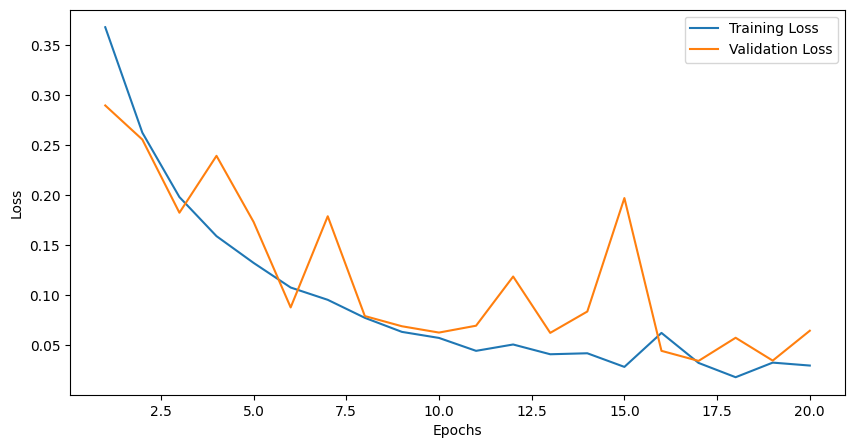

Evaluating: 100%|██████████| 164/164 [00:12<00:00, 12.67it/s]


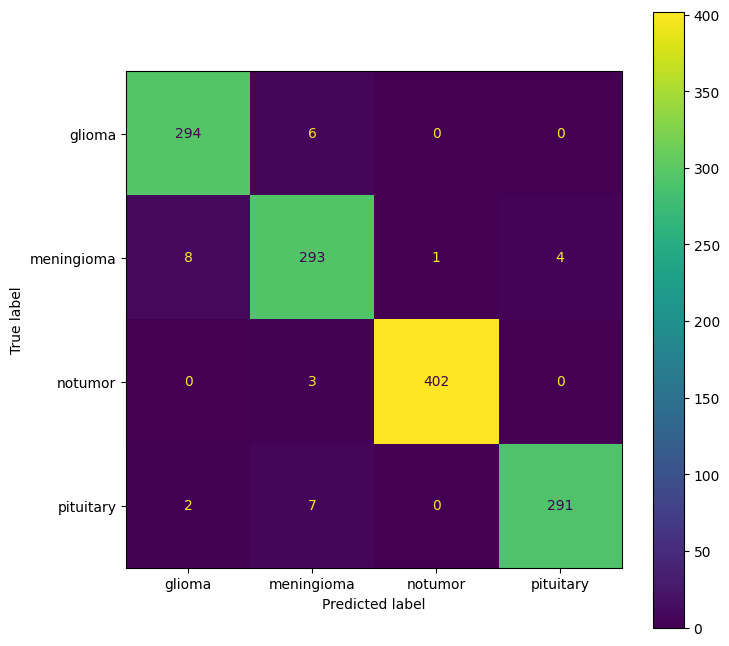

In [51]:
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

train_losses = []
val_losses = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_data in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))


    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_data in test_loader:
            inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(test_loader))

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}')


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


model.eval()
true_labels = []
pred_labels = []

with torch.no_grad():
    for batch_data in tqdm(test_loader, desc="Evaluating"):
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())


cm = confusion_matrix(true_labels, pred_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=['glioma', 'meningioma', 'notumor', 'pituitary'])




fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(ax=ax)
plt.show()

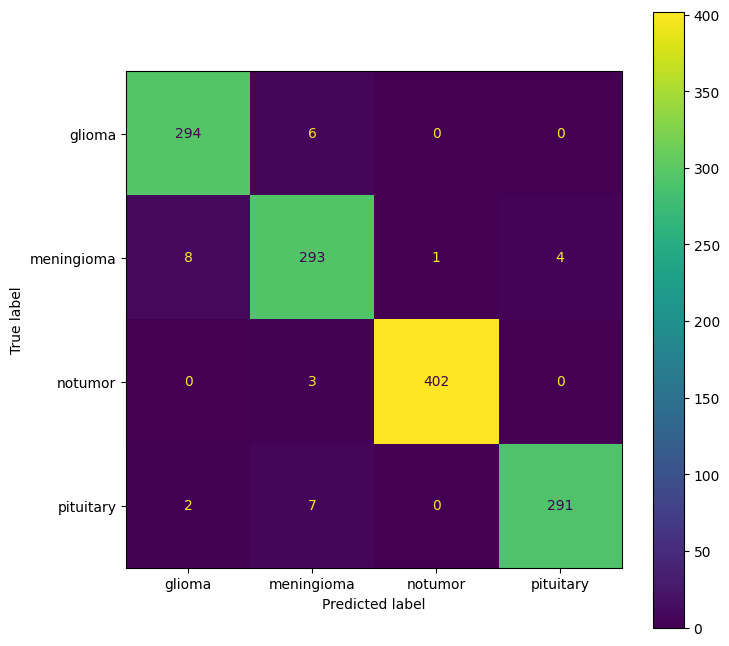

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true_labels = []
pred_labels = []

model.eval()
with torch.no_grad():
    for batch_data in test_loader:
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())


cm = confusion_matrix(true_labels, pred_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=['glioma', 'meningioma', 'notumor', 'pituitary'])


fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(ax=ax)
plt.show()


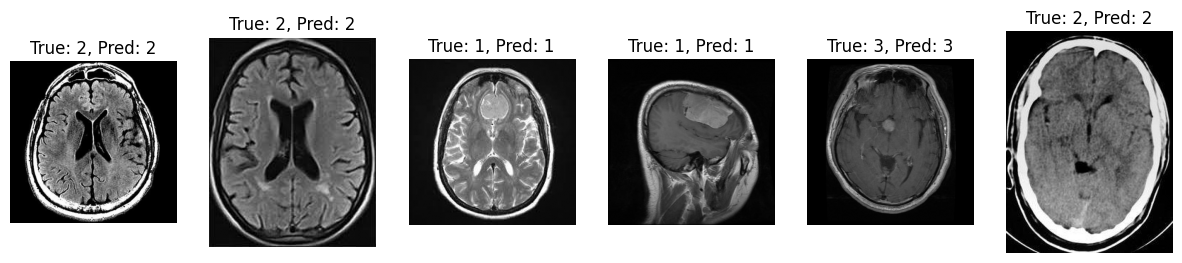

In [69]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import torch
from monai.transforms import Compose, EnsureChannelFirst, Resize, ScaleIntensity, ToTensor

sample_data = random.sample(test_files, 6)
sample_images = [data['image'] for data in sample_data]
sample_labels = [data['label'] for data in sample_data]

fig, axes = plt.subplots(1, 6, figsize=(15, 5))
model.eval()
with torch.no_grad():
    for i, img_path in enumerate(sample_images):
        img = Image.open(img_path).convert('L')
        #img_array = np.array(img)
        img_transformed = transforms({'image': img_path})['image'].unsqueeze(0).to(device)

        output = model(img_transformed)
        _, pred = torch.max(output, 1)

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'True: {sample_labels[i]}, Pred: {pred.item()}')
        axes[i].axis('off')

plt.show()



**WE ARE GOIN TO ROUND 2 ⛹**

In [70]:
import pandas as pd


df_train = pd.DataFrame(train_files)
df_test = pd.DataFrame(test_files)



In [71]:

train_transforms = Compose([
    LoadImaged(keys=['image']),
    AddChanneld(keys=['image']),
    Resized(keys=('image'), spatial_size=(224, 224)),

    ScaleIntensityd(keys=['image']),
    ToTensord(keys=['image', 'label'])
])

test_transforms = Compose([
    LoadImaged(keys=['image']),
    AddChanneld(keys=['image']),
    Resized(keys=('image'), spatial_size=(224, 224)),

    ScaleIntensityd(keys=['image']),
    ToTensord(keys=['image', 'label'])
])


def custom_collate_fn(batch):
    images = [item['image'] for item in batch]
    labels = [item['label'] for item in batch]

    images = torch.stack(images, dim=0)
    labels = torch.tensor(labels)

    return {'image': images, 'label': labels }


/usr/local/lib/python3.11/dist-packages/monai/utils/deprecate_utils.py:111: FutureWarning: <class 'monai.transforms.utility.dictionary.AddChanneld'>: Class `AddChanneld` has been deprecated since version 0.8. It will be removed in version 1.3. please use MetaTensor data type and monai.transforms.EnsureChannelFirstd instead with `channel_dim='no_channel'`.
  warn_deprecated(obj, msg, warning_category)
/usr/local/lib/python3.11/dist-packages/monai/utils/deprecate_utils.py:221: FutureWarning: monai.transforms.utility.dictionary EnsureChannelFirstd.__init__:meta_keys: Argument `meta_keys` has been deprecated since version 0.9. not needed if image is type `MetaTensor`.
  warn_deprecated(argname, msg, warning_category)


In [72]:
# Create datasets
train_dataset = Dataset(data=train_files, transform=train_transforms)
test_dataset = Dataset(data=test_files, transform=test_transforms)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=custom_collate_fn)

# Define the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DenseNet121(spatial_dims=2, in_channels=1, out_channels=4).to(device)

# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

Epoch 1/10: 100%|██████████| 714/714 [02:06<00:00,  5.65it/s]


Epoch 1/10, Training Loss: 0.6060977823594037, Validation Loss: 0.4343888998065689


Epoch 2/10: 100%|██████████| 714/714 [02:07<00:00,  5.60it/s]


Epoch 2/10, Training Loss: 0.36144603399105935, Validation Loss: 0.33139649578710884


Epoch 3/10: 100%|██████████| 714/714 [02:07<00:00,  5.62it/s]


Epoch 3/10, Training Loss: 0.25534840878777476, Validation Loss: 0.21952802313082828


Epoch 4/10: 100%|██████████| 714/714 [02:07<00:00,  5.61it/s]


Epoch 4/10, Training Loss: 0.20871828788244465, Validation Loss: 0.23437543135709923


Epoch 5/10: 100%|██████████| 714/714 [02:07<00:00,  5.61it/s]


Epoch 5/10, Training Loss: 0.15420775100163572, Validation Loss: 0.17314587996934722


Epoch 6/10: 100%|██████████| 714/714 [02:07<00:00,  5.58it/s]


Epoch 6/10, Training Loss: 0.1297610434843749, Validation Loss: 0.07952947313712751


Epoch 7/10: 100%|██████████| 714/714 [02:07<00:00,  5.60it/s]


Epoch 7/10, Training Loss: 0.11710045614908515, Validation Loss: 0.13182028906601595


Epoch 8/10: 100%|██████████| 714/714 [02:06<00:00,  5.66it/s]


Epoch 8/10, Training Loss: 0.10421066289097175, Validation Loss: 0.09977039751609526


Epoch 9/10: 100%|██████████| 714/714 [02:06<00:00,  5.63it/s]


Epoch 9/10, Training Loss: 0.07101221104672294, Validation Loss: 0.08857619854310675


Epoch 10/10: 100%|██████████| 714/714 [02:06<00:00,  5.65it/s]


Epoch 10/10, Training Loss: 0.05588221658364914, Validation Loss: 0.09391967602366605


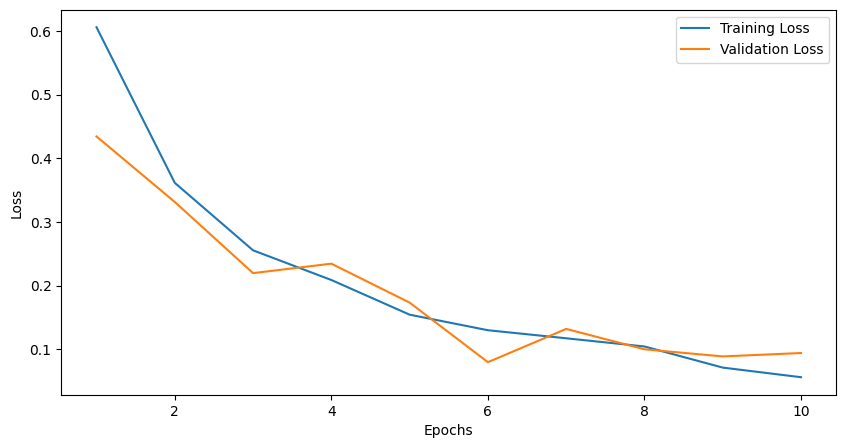

In [73]:
# Training loop with loss tracking
train_losses = []
val_losses = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_data in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_data in test_loader:
            inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(test_loader))

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}')

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
